The program forecast the consumption of electricity in coming future

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
df = pd.read_csv(r'C:\Users\sharm\Downloads\Time-Series-Analysis-master\Time-Series-Analysis-master\Electric_Production.csv')

In [4]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


visualize the Value

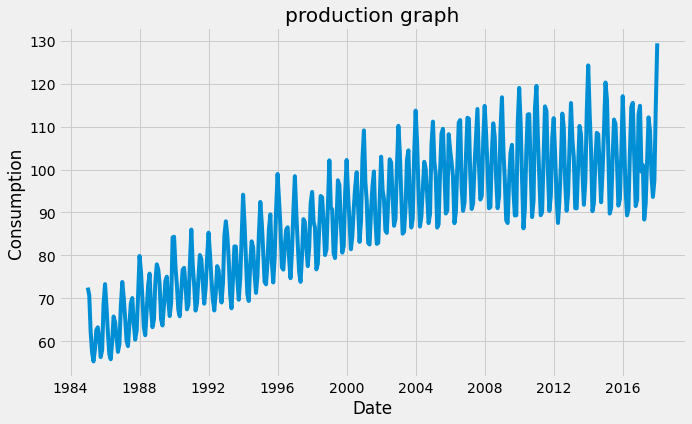

In [5]:
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")
plt.plot(df)


In the next stage, we will try to convert this into a stationary series.<br>


scatter plot of the Consumption

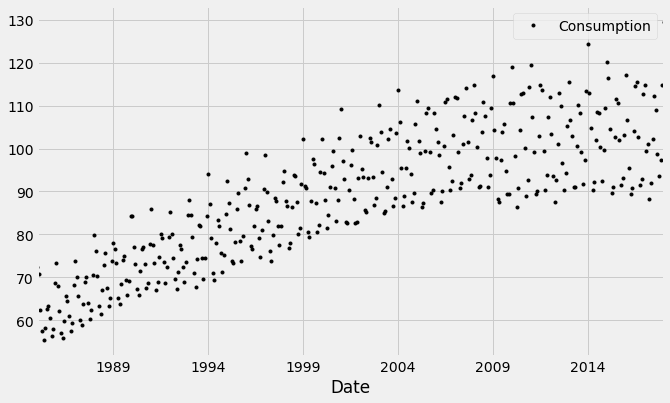

In [6]:
df.plot(style='k.')
plt.show()

distribution of the dataset

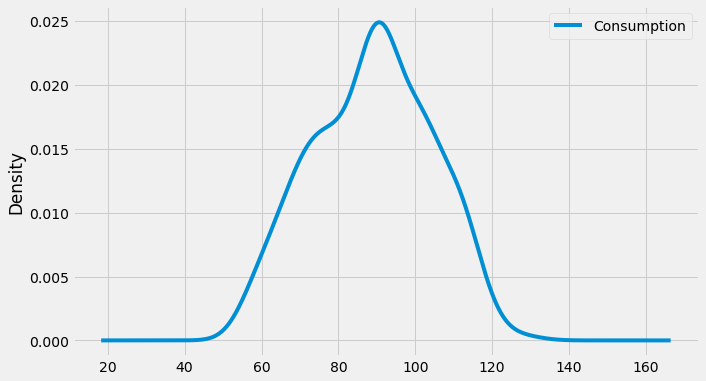

In [7]:
df.plot(kind='kde')
#We can observe a near-normal distribution(bell-curve) over sales values.

to separate the trend and the seasonality from a time series, <br>
we can decompose the series using the following code.


<br>
The above code has a separated trend and seasonality for us.<br>
This gives us more insight into our data and real-world actions.<br>
Clearly, there is an upward trend and a recurring event where consumption shoot maximum every year!<br>



<br>
we need to check if a series is stationary or not.<br>



<br>
Following function is a one which can plot a series with it’s rolling mean and standard deviation.<br>
 If both mean and standard deviation are flat lines(constant mean and constant variance),<br>
the series become stationary!<br>


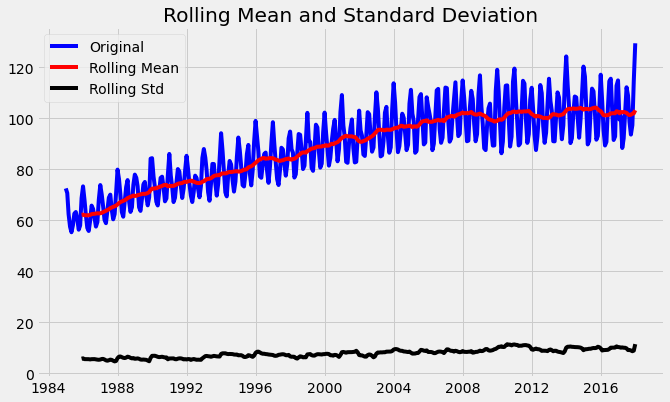

Results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Consumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)
#we can see the increasing mean and standard deviation and hence our series is not stationary.


 Eliminating trend 
<br>


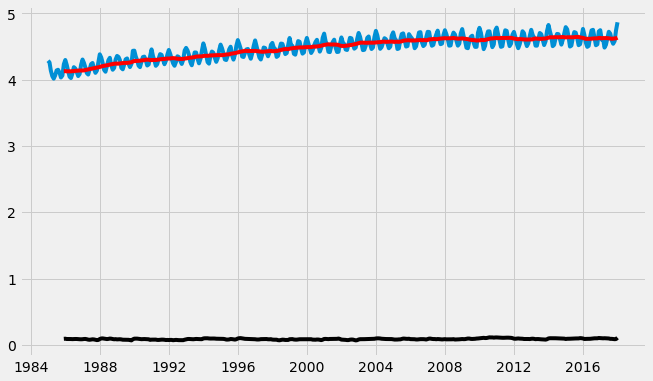

In [10]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()


<br>
After finding the mean, we take the difference of the series and the mean at every point in the series.<br>
This way, we eliminate trend out of a series and obtain a more stationary series.<br>


In [11]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)


<br>
Perform dickey fuller test (ADFT) once again. <br>
This is the actual code for dickey fuller test. <br>
We have to perform this function everytime to check whether the data <br>
is stationary or not.<br>


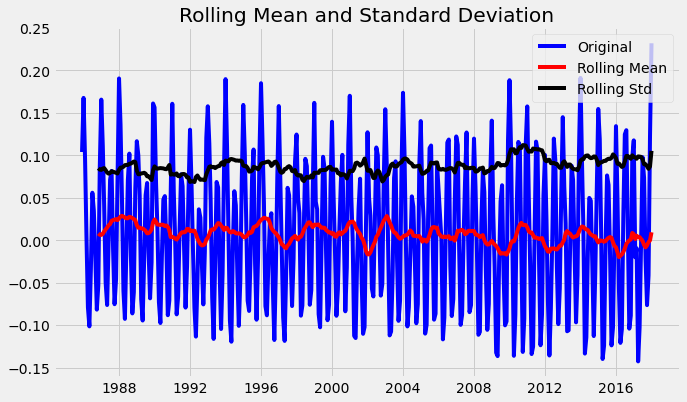

Results of dickey fuller test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [12]:
test_stationarity(df_log_moving_avg_diff)
#From the above graph we observed that the data attained stationartiy. We also see that the test statistics and critial value is relatively equal


<br>
We need to check the weighted average, to understand the trend of the data in timeseries. <br>
Take the previous log data nd perform the following operation.<br>


In [13]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()
print(weighted_average.head())

            Consumption
Date                   
1985-01-01     4.283658
1985-02-01     4.270484
1985-03-01     4.222468
1985-04-01     4.175897
1985-05-01     4.139460



<br>
The exponential moving average (EMA) is a weighted average of the last n prices, <br>
where the weighting decreases exponentially with each previous price/period. <br>
In other words, the formula gives recent prices more weight than past prices.<br>


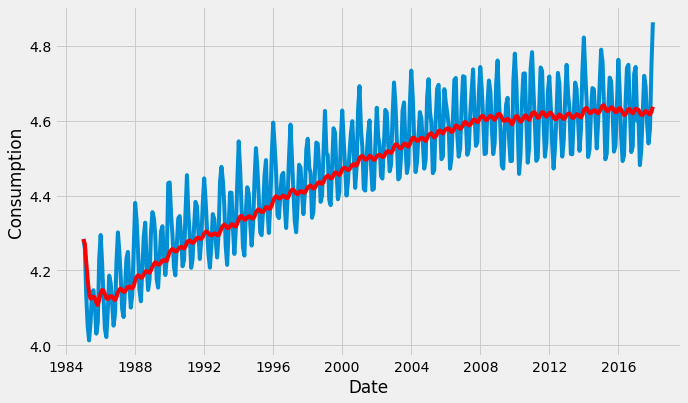

In [14]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Consumption")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
#plt.legend()
plt.show(block =False)

previously we subtracted data_logscale with moving average, now take the same log_scale and subtract with weighted_average

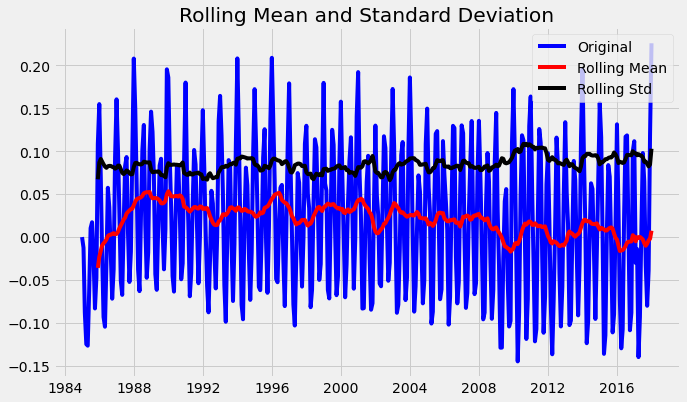

Results of dickey fuller test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [15]:
logScale_weightedMean = df_log-weighted_average
# use the same function defined above and pass the object into it.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)


<br>
Differencing is a method of transforming a time series dataset. <br>
It can be used to remove the series dependence on time, so-called temporal dependence. <br>
This includes structures like trends and seasonality. Differencing can help stabilize the mean<br>
of the time series by removing changes in the level of a time series, and so eliminating (or reducing) <br>
trend and seasonality.<br>
Differencing is performed by subtracting the previous observation from the current observation.<br>


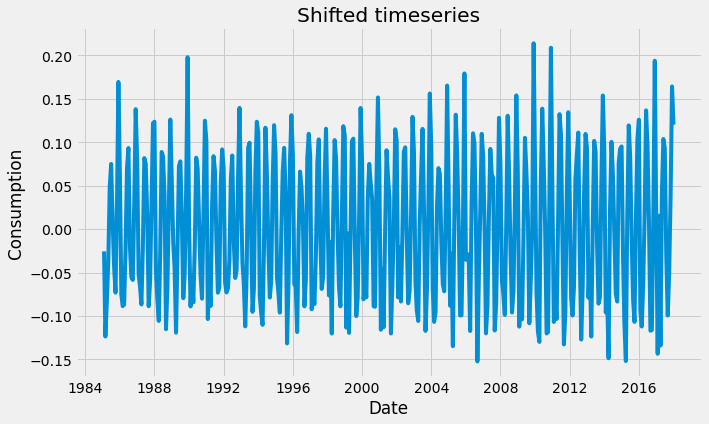

In [16]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

Let us test the stationarity of our resultant series

In [17]:
df_log_diff.dropna(inplace=True)

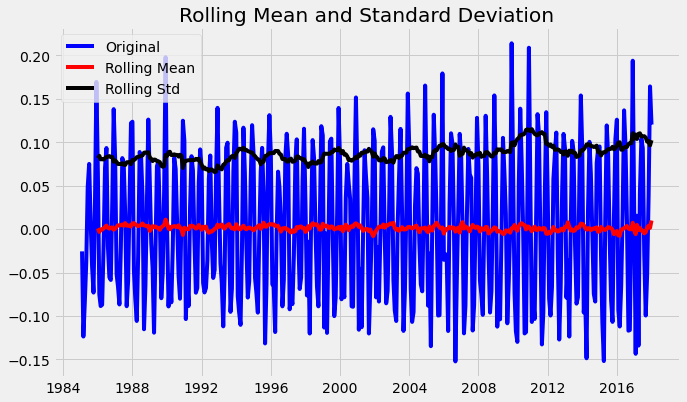

Results of dickey fuller test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [18]:
test_stationarity(df_log_diff)
#Now the series is stationary as both maean and std are constant


<br>
Decomposition<br>
It provides a structured way of thinking about a time series forecasting problem,<br>
 both generally in terms of modelling complexity and specifically in terms of how to best capture<br>
 each of these components in a given model.<br>


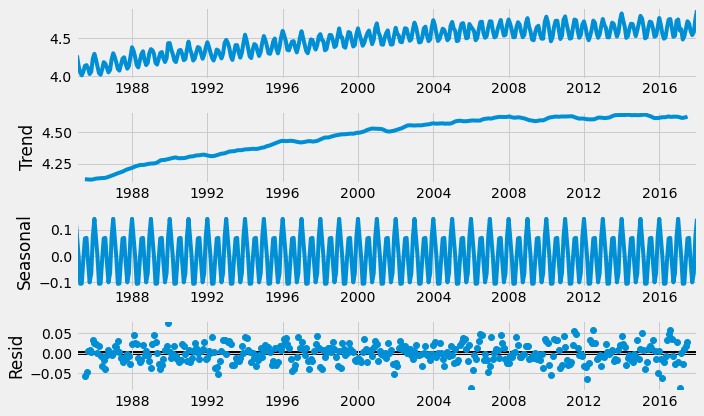

In [20]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()

In [21]:
trend = result.trend
trend.dropna(inplace=True)

In [22]:
seasonality = result.seasonal
seasonality.dropna(inplace=True)

In [23]:
residual = result.resid
residual.dropna(inplace=True)

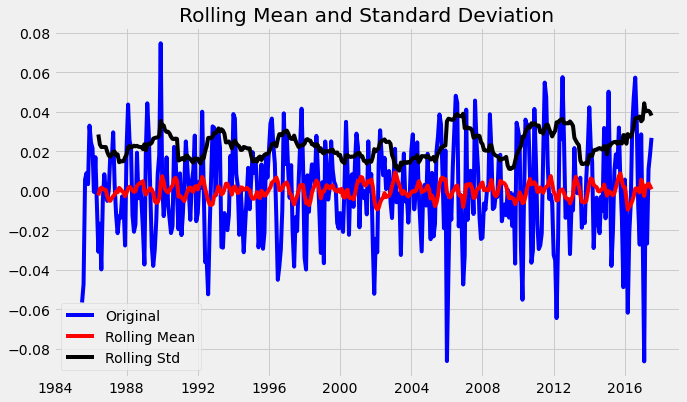

Results of dickey fuller test


KeyError: 'Consumption'

In [24]:
test_stationarity(residual)

Forecasting 

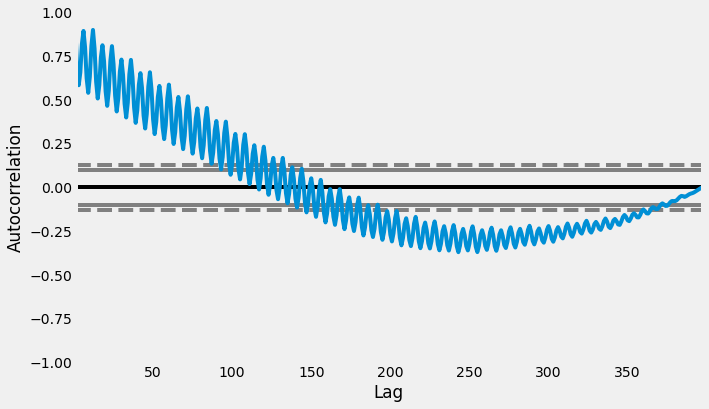

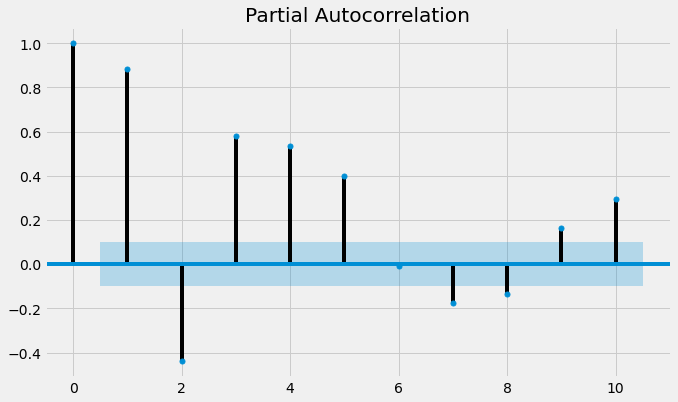

In [25]:
#Below code plots, both ACF and PACF plots for us
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
autocorrelation_plot(df_log)
plot_pacf(df_log, lags=10)
plt.show()


plot acf  and pacf graphs ( auto corellation function and partially auto corellation function )<br>
to find 'p' from p,d,q we need to use, PACF graphs and for 'q' use ACF graph

In [26]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')

ols stands for ordinary least squares used to minimise the errors

Plot PACF

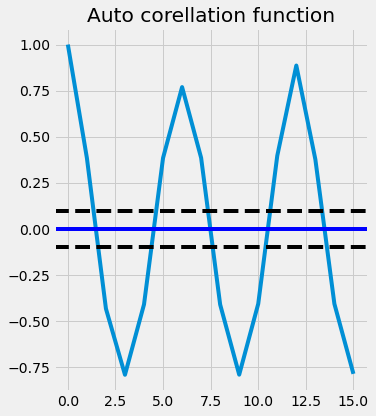

In [27]:
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()

Plot ACF

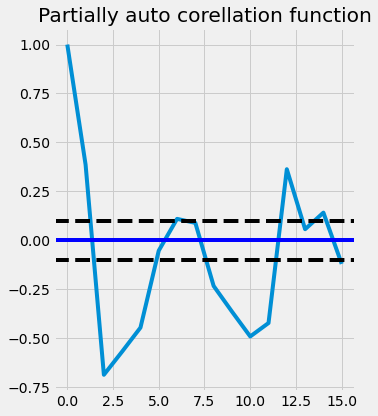

In [28]:
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()


<br>
What suggests AR(q) terms in a model?<br>
ACF shows a decay<br>
PACF cuts off quickly<br>
What suggests MA(p) terms in a model?<br>
ACF cuts off sharply<br>
PACF decays gradually<br>
In PACF, the plot crosses the first dashed line(95% confidence interval line) around lag 2 hence p=2<br>
Below code fits an ARIMA model for us<br>


C:\Users\sharm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sharm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sharm\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\sharm\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


RSS : 0.522728


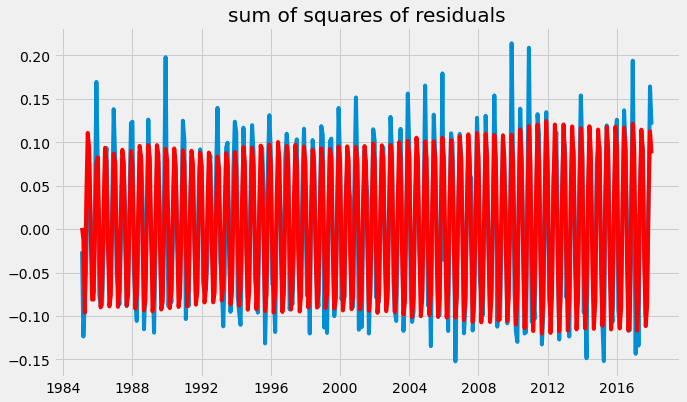

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))
#RSS : 0.5227

less the RSS more effective the model is


<br>
forecast electricity consumption for next 4 months<br>


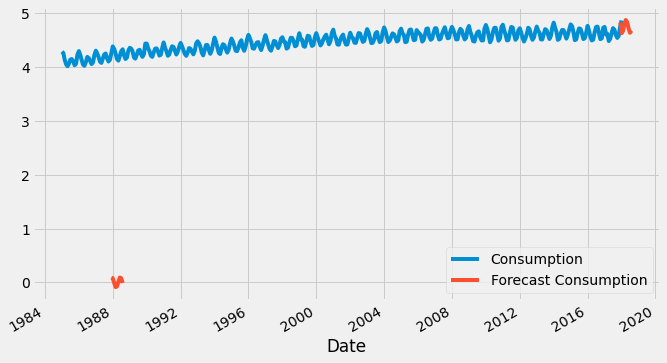

In [30]:
future=df_log
future=future.reset_index()
mon=future["Date"]
mon=mon+pd.DateOffset(months=7)
future_dates = mon[-7-1:]
future = future.set_index('Date')
newDf = pd.DataFrame(index=future_dates, columns=future.columns)
future = pd.concat([future,newDf])
future["Forecast Consumption"]= result_AR.predict(start=35, end =43, dynamic=True)
future["Forecast Consumption"].iloc[-10:]=result_AR.forecast(steps=10)[0]
future[['Consumption','Forecast Consumption']].plot()


we founded the predicted values in the above code and we need to print the values in the form of series

In [31]:
ARIMA_predicts = pd.Series(result_AR.fittedvalues,copy=True)
ARIMA_predicts.head()

Date
1985-02-01    0.001400
1985-03-01   -0.012058
1985-04-01   -0.096072
1985-05-01    0.032756
1985-06-01    0.110850
dtype: float64

finding the cummulative sum

In [32]:
ARIMA_predicts_cumsum = ARIMA_predicts.cumsum()
print(ARIMA_predicts_cumsum.head())

Date
1985-02-01    0.001400
1985-03-01   -0.010658
1985-04-01   -0.106731
1985-05-01   -0.073975
1985-06-01    0.036875
dtype: float64


In [33]:
ARIMA_predicts_log = pd.Series(df_log['Consumption'],index = df_log.index)
ARIMA_predicts_log = ARIMA_predicts_log.add(ARIMA_predicts_cumsum,fill_value=0)
print(ARIMA_predicts_log.head())

Date
1985-01-01    4.283658
1985-02-01    4.259449
1985-03-01    4.123711
1985-04-01    3.944557
1985-05-01    3.939071
dtype: float64


converting back to the exponential form results in getting back to the original data.

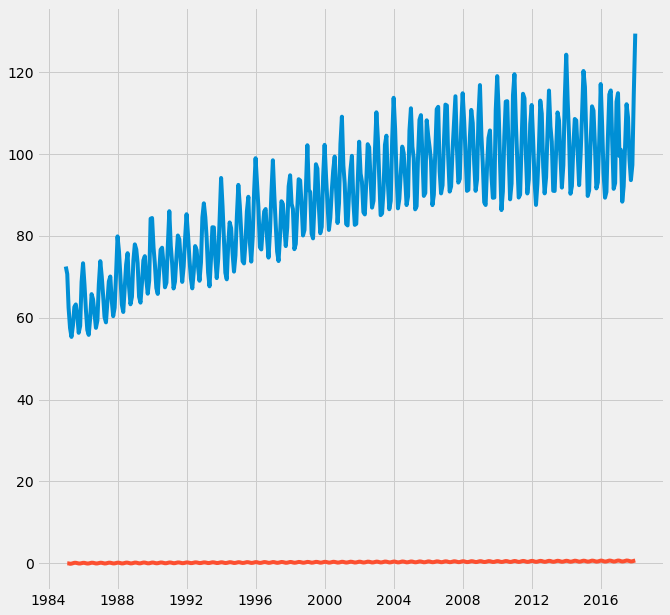

In [34]:
ARIMA_final_preditcs = np.exp(ARIMA_predicts_log)
rcParams['figure.figsize']=10,10
plt.plot(df)
plt.plot(ARIMA_predicts_cumsum)

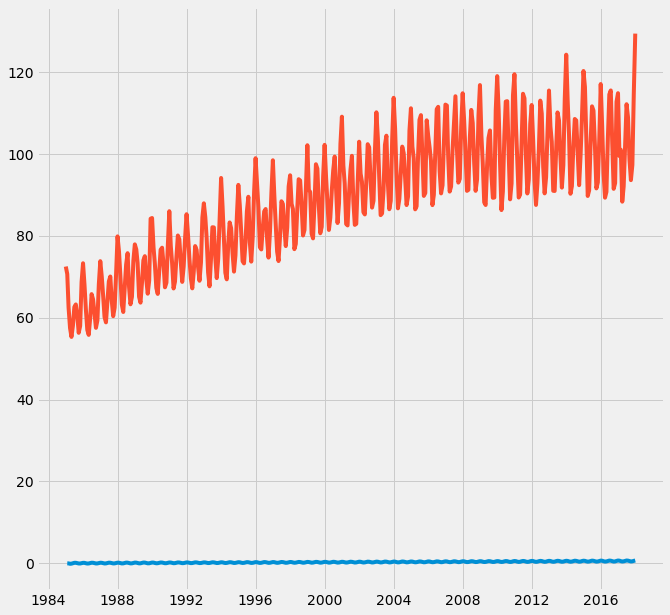

In [35]:
plt.plot(ARIMA_predicts_cumsum)
plt.plot(df)

Future prediction

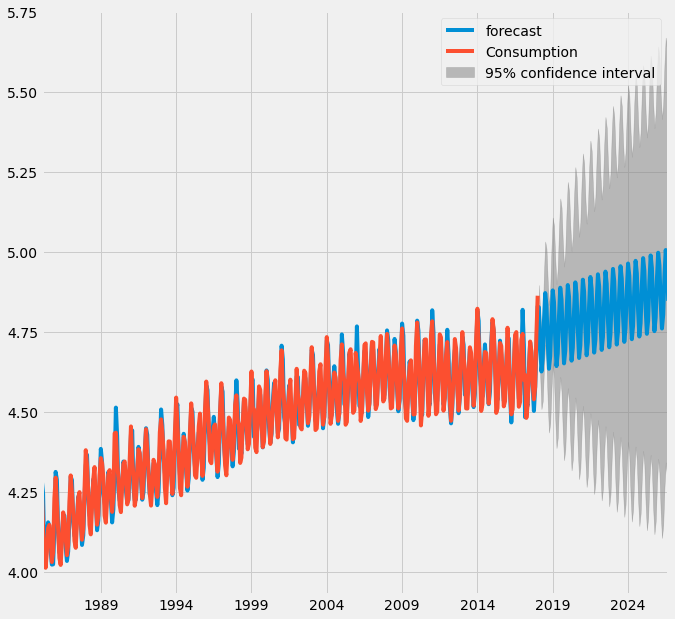

In [36]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=200)

from the above graph, we calculated the future predictions till 2024<br>
the greyed out area is the confidence interval wthe predictions will not cross that area.